In [4]:
import os
import numpy as np
import xarray as xr
import netCDF4

In [5]:
def FileList(path):
    '''
    Return all files with assigned surffix.
    '''
    fl=[]
    for f in os.listdir(path):
#         if f.endswith('.nc'):
        if f.endswith(tuple(['.hdf','he5','nc'])):
            fl.append(f)
    return fl   

In [6]:
def WriteFile(SIC,Lon,Lat,path):
    
    '''
    Write into a netcdf file `asi_sic_80_yyyymmdd.nc`
    '''
    try: ncfile.close()  # just to be safe, make sure dataset is not already open.
    except: pass
    ncfile = netCDF4.Dataset(path,mode='w',format='NETCDF4')
#     print(ncfile)
    
    
    ndim = SIC.shape[0]
    y = ncfile.createDimension('y', ndim)     # latitude axis
    x = ncfile.createDimension('x', ndim)    # longitude axis

    # Define two variables with the same names as dimensions,
    # a conventional way to define "coordinate variables".
    lat = ncfile.createVariable('lat', np.float32, ('x','y'))
    lat.units = 'degrees_north'
    lat.long_name = 'latitude'
    lon = ncfile.createVariable('lon', np.float32, ('x','y'))
    lon.units = 'degrees_east'
    lon.long_name = 'longitude'
    
    # Define a 2D variable to hold the data
    sic = ncfile.createVariable('sic',np.float32,('x','y')) # note: unlimited dimension is leftmost
    sic.units = 'None' 
    sic.standard_name = 'Sea_Ice_Concentration' # this is a CF standard name

    # Write latitudes, longitudes, Time.
    # Note: the ":" is necessary in these "write" statements
    lat[:] = Lat
    lon[:] = Lon
    
    # Write the data.  This writes the whole 2D netCDF variable all at once.
    sic[:,:] = SIC  # Appends data along unlimited dimension
#     print("-- Wrote data, sic.shape is now ", sic.shape)
    # read data back from variable (by slicing it), print min and max
#     print("-- Min/Max values:", np.nanmin(sic), np.nanmax(sic))
    
    # first print the Dataset object to see what we've got
    print(ncfile)
    # close the Dataset.
    ncfile.close(); print('Dataset is closed!')

In [7]:
path = ('D:\\MPE-SIC\\OSI-401')

FL = FileList(path)
# print(FL)

# fname = FL[0]
for fname in FL:

    date = fname[-15:-7]
    print(date)
    
    ''' Read SIC '''
    da = xr.open_dataset(os.path.join(path,fname))
    Lat10 = da.lat.values
    Lon10 = da.lon.values
    SIC = da.ice_conc.values[0,:,:]

    ''' Crop into 200 x 200 grid'''
    d = 100
    Lono = Lon10[584-d:584+d,385-d:385+d]
    Lato = Lat10[584-d:584+d,385-d:385+d]
    temp = SIC[584-d:584+d,385-d:385+d]
    
    
    ''' Write Files'''
    savepath = 'D:\\MPE-SIC\\'
    fpath = savepath + 'osi-401_sic_80_'+date+'.nc'
    WriteFile(temp,Lono,Lato,fpath)    
    
    print('ok')

20070828
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(200), x(200)
    variables(dimensions): float32 lat(x,y), float32 lon(x,y), float32 sic(x,y)
    groups: 

Dataset is closed!
ok
20080701
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(200), x(200)
    variables(dimensions): float32 lat(x,y), float32 lon(x,y), float32 sic(x,y)
    groups: 

Dataset is closed!
ok
20100628
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(200), x(200)
    variables(dimensions): float32 lat(x,y), float32 lon(x,y), float32 sic(x,y)
    groups: 

Dataset is closed!
ok
20100721
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(200), x(200)
    variables(dimensions): float32 lat(x,y), float32 lon(x,y), float32 sic(x,y)
    groups: 

Dataset is closed!
ok
2010

## Test 

In [15]:
fname = FL[0]
date = fname[-15:-7]
da = xr.open_dataset(os.path.join(path,fname))
SIC = da.ice_conc.values[0,:,:]
Lat10 = da.lat.values
Lon10 = da.lon.values

print(np.nanmin(SIC), np.nanmax(SIC))


d = 100
Lono = Lon10[584-d:584+d,385-d:385+d]
Lato = Lat10[584-d:584+d,385-d:385+d]
temp = SIC[584-d:584+d,385-d:385+d]

print(SIC.shape)

print(temp.shape)
# print(np.nanmin(temp),np.nanmax(temp))

0.0 100.0
(1120, 760)
(200, 200)


In [18]:
WriteFile(temp,Lono,Lato,'osi-401_sic_80_'+date+'.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(200), x(200)
    variables(dimensions): float32 lat(x,y), float32 lon(x,y), float32 sic(x,y)
    groups: 

Dataset is closed!


In [8]:
ds = xr.open_dataset('osi-401_sic_80_'+date+'.nc')
ds

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\kathy\\research\\Sea-ice-concentration\\p_pro\\osi-401_sic_80_20190825.nc'

In [17]:
ds.close()

In [21]:
SIC_o = ds.sic.values
print(np.nanmin(SIC_o), np.nanmax(SIC_o))

0.0 100.0


In [23]:
import matplotlib.pyplot as plt

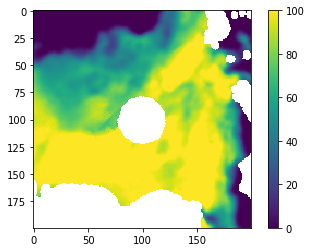

In [24]:
plt.imshow(SIC_o)
plt.colorbar()